In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [5]:
df['division'].describe()

count    31984.000000
mean      1932.563032
std       1715.228694
min          1.000000
25%        610.000000
50%       1425.000000
75%       2611.000000
max       6979.000000
Name: division, dtype: float64

In [6]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [7]:
df['citizen'] = pd.get_dummies(df.ctz.isna(), drop_first=True)
df['american'] = pd.get_dummies(df.state.isna(), drop_first=True)
df['gender'] = pd.get_dummies(df.gender, drop_first=True)
df['local'] = np.where(df.state == 'MA', 1, 0)

features = df.select_dtypes(['number'])

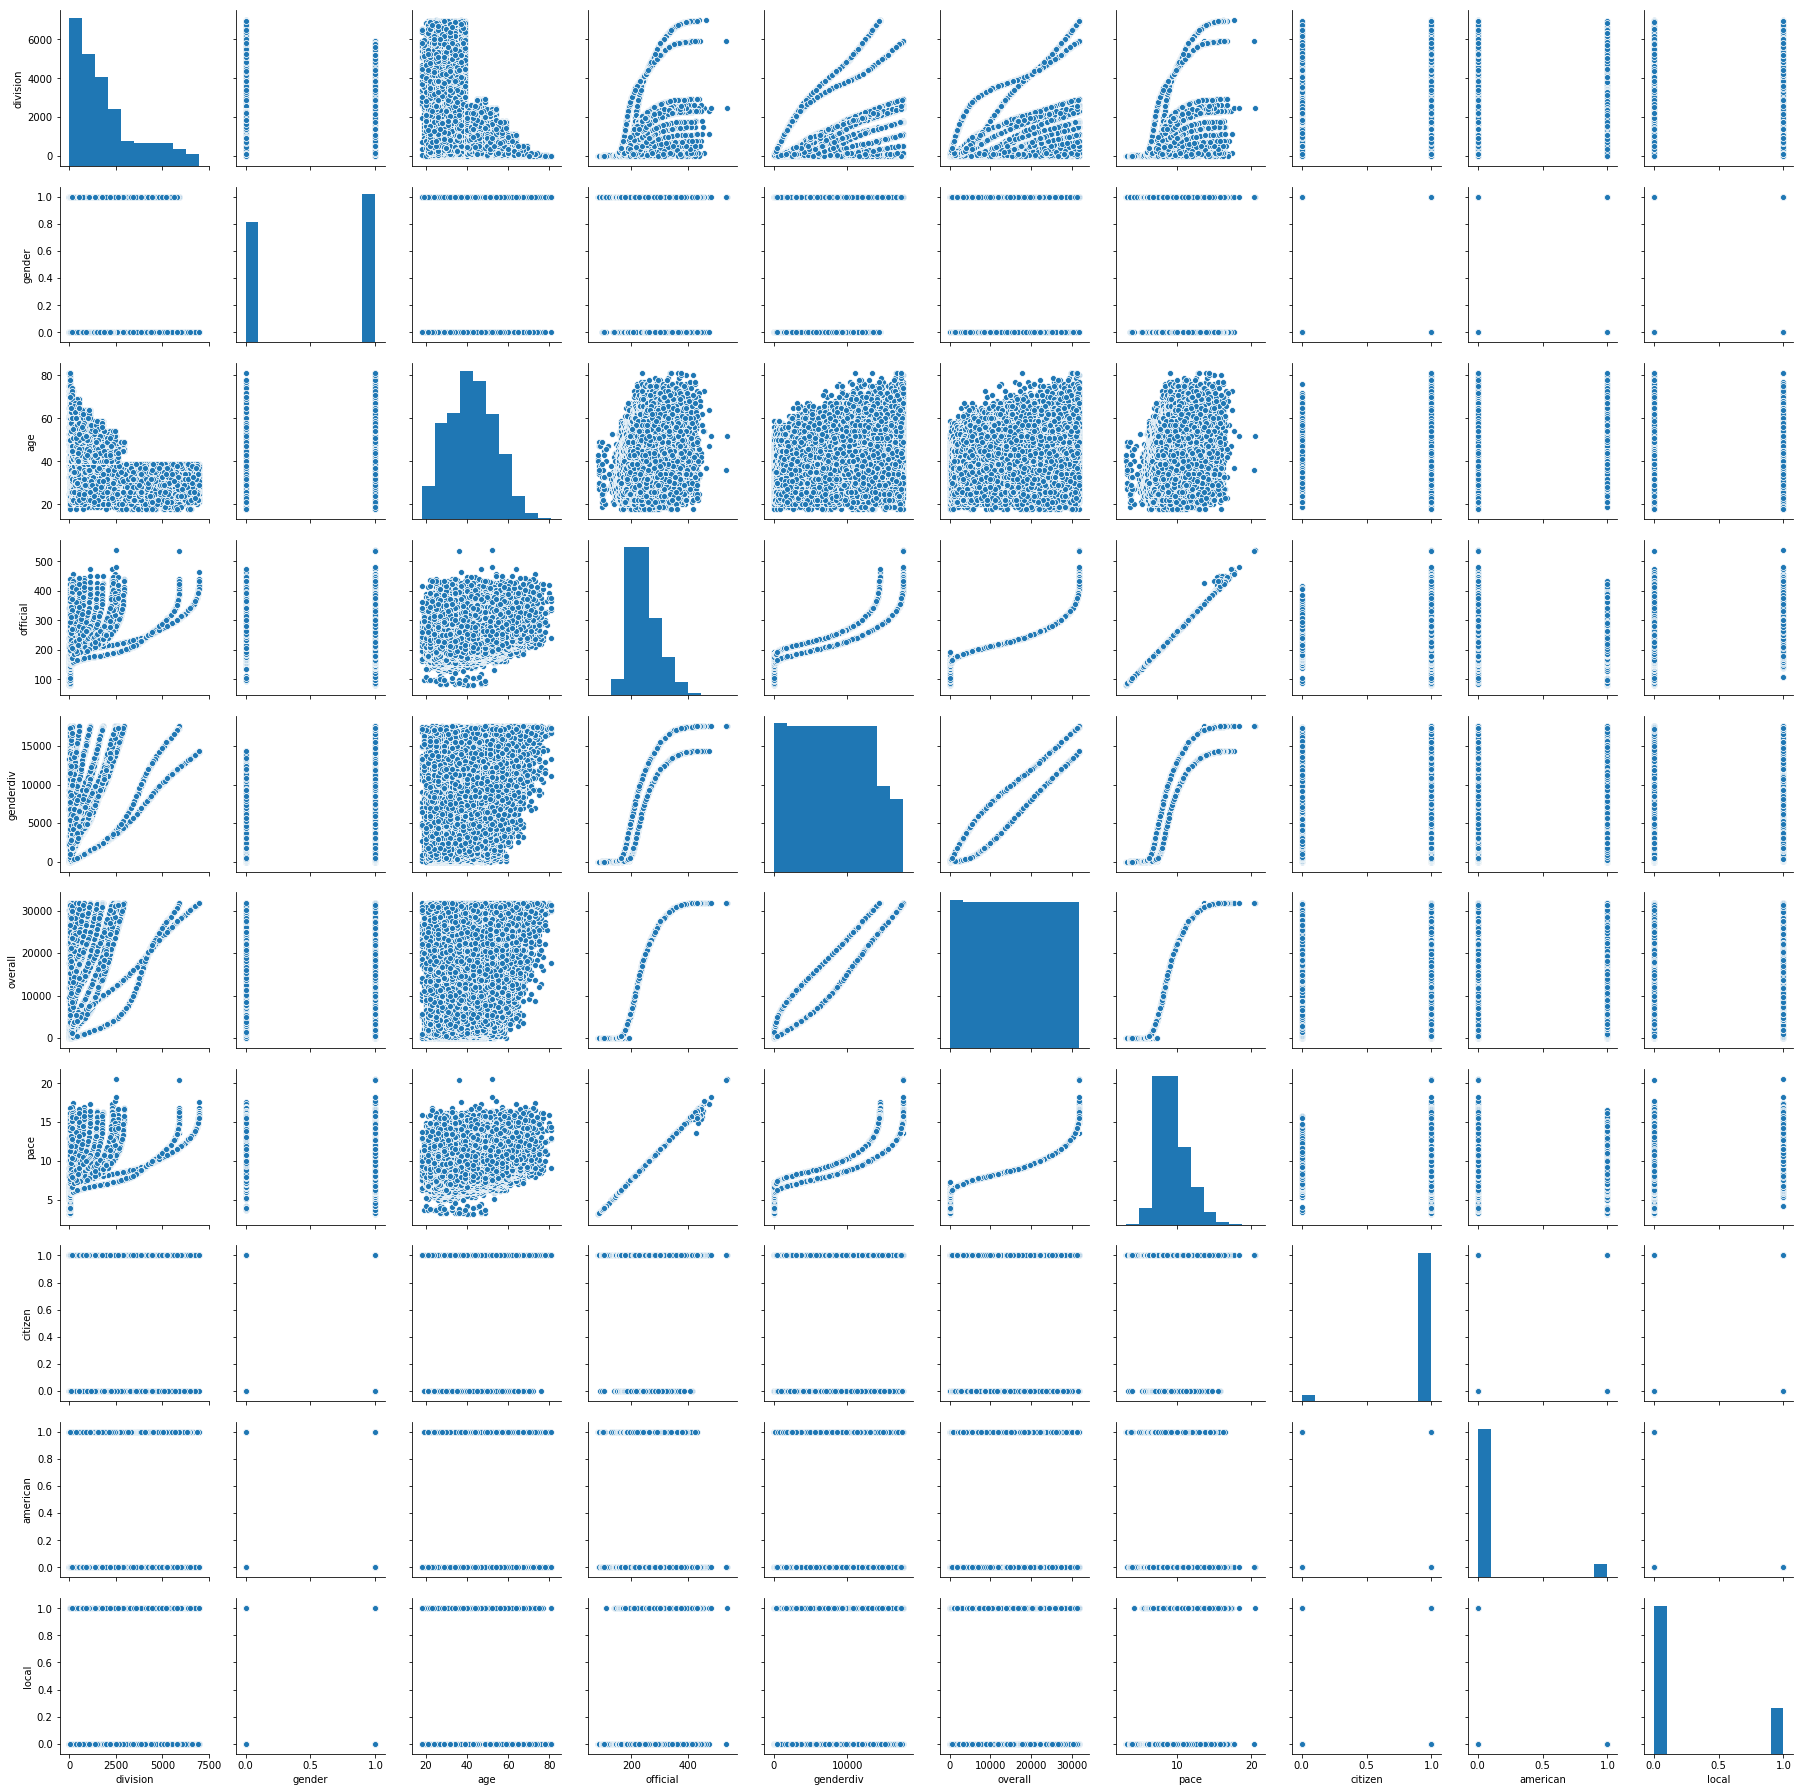

In [8]:
sns.pairplot(df)
plt.show()

# Domestic vs. Foreign

In [9]:
X = features.drop(columns=['american'])
y = features.american

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9)

# Normalize the data.
X_norm = normalize(X)

In [10]:
for i in range(2,8):
    y_pred = KMeans(n_clusters=i).fit_predict(X_norm)
    print('Comparing k-means with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y))

Comparing k-means with 2 clusters against the data:
american      0     1
row_0                
0         20361  1395
1          9047  1181
Comparing k-means with 3 clusters against the data:
american      0     1
row_0                
0         13707   637
1         12643  1634
2          3058   305
Comparing k-means with 4 clusters against the data:
american      0     1
row_0                
0         13697   633
1         12538  1618
2          2995   272
3           178    53
Comparing k-means with 5 clusters against the data:
american      0     1
row_0                
0          3385   160
1         12538  1618
2          2995   272
3         10313   473
4           177    53
Comparing k-means with 6 clusters against the data:
american      0    1
row_0               
0          4258  661
1         10317  473
2           175   52
3          3018  273
4          3381  160
5          8259  957
Comparing k-means with 7 clusters against the data:
american     0    1
row_0           

In [11]:
y_pred = KMeans(n_clusters=2).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

0.03191099082392817

In [12]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 8


In [13]:
y_pred = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

0.013117711652961972

In [14]:
for i in range(2,8):
    X_tn = normalize(X_train)
    y_pred = SpectralClustering(n_clusters=i).fit_predict(X_tn)
    print('Comparing spectral clustering with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y_train))

Comparing spectral clustering with 2 clusters against the data:
american     0    1
row_0              
0         1034  135
1         1896  133
Comparing spectral clustering with 3 clusters against the data:
american     0    1
row_0              
0         1290  174
1         1324   65
2          316   29
Comparing spectral clustering with 4 clusters against the data:
american     0    1
row_0              
0         1273  170
1         1320   65
2           28    4
3          309   29
Comparing spectral clustering with 5 clusters against the data:
american     0    1
row_0              
0          730   32
1          855   55
2          272   23
3           26    4
4         1047  154
Comparing spectral clustering with 6 clusters against the data:
american     0    1
row_0              
0          732   33
1          446   65
2          262   13
3          269   24
4           45    3
5         1176  130
Comparing spectral clustering with 7 clusters against the data:
american     0  

In [15]:
y_pred = SpectralClustering(n_clusters=2).fit_predict(X_tn)

metrics.adjusted_rand_score(y_train, y_pred)

0.023999698578792875

# Gender

In [16]:
X = features.drop(columns=['gender'])
y = features.gender

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9)

# Normalize the data.
X_norm = normalize(X)

In [17]:
for i in range(2,8):
    y_pred = KMeans(n_clusters=i).fit_predict(X_norm)
    print('Comparing k-means with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y))

Comparing k-means with 2 clusters against the data:
gender      0      1
row_0               
0       14344   7412
1          23  10205
Comparing k-means with 3 clusters against the data:
gender      0      1
row_0               
0           0  14277
1       14344      0
2          23   3340
Comparing k-means with 4 clusters against the data:
gender      0      1
row_0               
0        3542      0
1       10802      0
2           0  14277
3          23   3340
Comparing k-means with 5 clusters against the data:
gender     0     1
row_0             
0       5905     0
1          0  3228
2          0  7302
3       8426  6895
4         36   192
Comparing k-means with 6 clusters against the data:
gender      0     1
row_0              
0           0  9210
1       10795     0
2           0  3288
3          36   191
4           0  4928
5        3536     0
Comparing k-means with 7 clusters against the data:
gender     0     1
row_0             
0       6532     0
1          0  9210
2   

In [18]:
y_pred = KMeans(n_clusters=3).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

0.8122894205424661

In [19]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1


In [20]:
y_pred = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

2.3549519916001855e-16

In [21]:
for i in range(2,8):
    X_tn = normalize(X_train)
    y_pred = SpectralClustering(n_clusters=i).fit_predict(X_tn)
    print('Comparing spectral clustering with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y_train))

Comparing spectral clustering with 2 clusters against the data:
gender     0     1
row_0             
0          1  1000
1       1447   750
Comparing spectral clustering with 3 clusters against the data:
gender     0     1
row_0             
0          3   358
1       1445     0
2          0  1392
Comparing spectral clustering with 4 clusters against the data:
gender     0     1
row_0             
0          1  1374
1          0   351
2       1444     0
3          3    25
Comparing spectral clustering with 5 clusters against the data:
gender    0     1
row_0            
0       942     0
1         0   305
2         0  1161
3       503   261
4         3    23
Comparing spectral clustering with 6 clusters against the data:
gender    0    1
row_0           
0         0  498
1       694  656
2       517  232
3       235    0
4         0  295
5         2   69
Comparing spectral clustering with 7 clusters against the data:
gender    0    1
row_0           
0       719  629
1       535  242
2

In [22]:
y_pred = SpectralClustering(n_clusters=3).fit_predict(X_tn)

metrics.adjusted_rand_score(y_train, y_pred)

0.8032345823700285

# Local vs. Non-local

In [23]:
X = features.drop(columns=['local'])
y = features.local

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9)

# Normalize the data.
X_norm = normalize(X)

In [24]:
for i in range(2,8):
    y_pred = KMeans(n_clusters=i).fit_predict(X_norm)
    print('Comparing k-means with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y))

Comparing k-means with 2 clusters against the data:
local      0     1
row_0             
0      15215  6540
1       9182  1047
Comparing k-means with 3 clusters against the data:
local      0     1
row_0             
0       3008   355
1      10974  3303
2      10415  3929
Comparing k-means with 4 clusters against the data:
local      0     1
row_0             
0      10878  3278
1       2917   350
2      10402  3928
3        200    31
Comparing k-means with 5 clusters against the data:
local      0     1
row_0             
0      10878  3278
1       2917   350
2       3203   340
3        199    31
4       7200  3588
Comparing k-means with 6 clusters against the data:
local     0     1
row_0            
0      6272  2941
1      2936   354
2      3208   342
3      4590   333
4      7195  3586
5       196    31
Comparing k-means with 7 clusters against the data:
local     0     1
row_0            
0      4587   332
1      2719  2285
2      6274  2942
3       195    31
4      2525   271


In [25]:
y_pred = KMeans(n_clusters=6).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

-0.019912590045812906

In [26]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


In [27]:
y_pred = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

0.0

In [28]:
for i in range(2,8):
    X_tn = normalize(X_train)
    y_pred = SpectralClustering(n_clusters=i).fit_predict(X_tn)
    print('Comparing spectral clustering with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y_train))

Comparing spectral clustering with 2 clusters against the data:
local     0    1
row_0           
0       982  129
1      1472  615
Comparing spectral clustering with 3 clusters against the data:
local     0    1
row_0           
0       308   30
1      1059  405
2      1087  309
Comparing spectral clustering with 4 clusters against the data:
local     0    1
row_0           
0        21    4
1       302   28
2      1073  307
3      1058  405
Comparing spectral clustering with 5 clusters against the data:
local    0    1
row_0          
0      788  172
1      969  183
2      267   21
3      410  364
4       20    4
Comparing spectral clustering with 6 clusters against the data:
local     0    1
row_0           
0       414  363
1       474   34
2      1019  292
3       244   29
4        34    5
5       269   21
Comparing spectral clustering with 7 clusters against the data:
local    0    1
row_0          
0      173   19
1      571  146
2      262   19
3      585  159
4      444  371
5

In [29]:
y_pred = SpectralClustering(n_clusters=2).fit_predict(X_tn)

metrics.adjusted_rand_score(y_train, y_pred)

-0.0275712310350024

# Division

In [30]:
features.columns

Index(['division', 'gender', 'age', 'official', 'genderdiv', 'overall', 'pace',
       'citizen', 'american', 'local'],
      dtype='object')

In [31]:
len(features.division.unique())

6979

In [39]:
features.division.value_counts()

1       23
2       22
3       22
4       21
6       20
5       20
7       20
8       20
11      19
9       19
10      19
18      18
15      18
19      18
13      18
12      18
17      18
20      18
16      18
14      18
38      17
22      17
33      17
36      17
24      17
31      17
35      17
29      17
23      17
39      17
        ..
6541     1
6032     1
6810     1
6683     1
6842     1
6460     1
6794     1
5924     1
6778     1
6111     1
6016     1
6476     1
6095     1
6635     1
6890     1
6508     1
6922     1
6079     1
6129     1
6906     1
6080     1
6651     1
6667     1
6492     1
6062     1
6874     1
6064     1
6788     1
6858     1
6829     1
Name: division, Length: 6979, dtype: int64

In [32]:
X = features.drop(columns=['division'])
y = features.division

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9)

# Normalize the data.
X_norm = normalize(X)

In [33]:
for i in range(2,8):
    y_pred = KMeans(n_clusters=i).fit_predict(X_norm)
    print('Comparing k-means with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y))

Comparing k-means with 2 clusters against the data:
division  1     2     3     4     5     6     7     8     9     10    ...   \
row_0                                                                 ...    
0           14    14    14    13    13    13    13    12    12    12  ...    
1            9     8     8     8     7     7     7     8     7     7  ...    

division  6970  6971  6972  6973  6974  6975  6976  6977  6978  6979  
row_0                                                                 
0            0     0     0     0     0     0     0     0     0     0  
1            1     1     1     1     1     1     1     1     1     1  

[2 rows x 6979 columns]
Comparing k-means with 3 clusters against the data:
division  1     2     3     4     5     6     7     8     9     10    ...   \
row_0                                                                 ...    
0            8     7     8     8     7     7     7     7     7     7  ...    
1            6     6     7     7     8  

In [34]:
y_pred = KMeans(n_clusters=6).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

-0.0001325553409352932

In [35]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


In [36]:
y_pred = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(X_norm)

metrics.adjusted_rand_score(y, y_pred)

0.0

In [37]:
for i in range(2,8):
    X_tn = normalize(X_train)
    y_pred = SpectralClustering(n_clusters=i).fit_predict(X_tn)
    print('Comparing spectral clustering with %d clusters against the data:' % (i))
    print(pd.crosstab(y_pred, y_train))

Comparing spectral clustering with 2 clusters against the data:
division  1     2     3     5     6     7     8     9     10    11    ...   \
row_0                                                                 ...    
0            2     0     0     1     2     1     2     1     1     1  ...    
1            1     1     1     0     0     0     1     1     0     0  ...    

division  6878  6879  6886  6893  6925  6951  6964  6968  6969  6973  
row_0                                                                 
0            0     0     0     0     0     0     0     0     0     0  
1            1     1     1     1     1     1     1     1     1     1  

[2 rows x 2335 columns]
Comparing spectral clustering with 3 clusters against the data:
division  1     2     3     5     6     7     8     9     10    11    ...   \
row_0                                                                 ...    
0            0     0     0     1     1     1     1     0     0     0  ...    
1            0  

In [38]:
y_pred = SpectralClustering(n_clusters=2).fit_predict(X_tn)

metrics.adjusted_rand_score(y_train, y_pred)

-6.115223066516665e-05